<h1 style="color:#c77dff; text-align:center;">
  Temps d'écran allumé
</h1>

<h2 style="color:#a3b18a;">1-L'IMPORTATION DES BIBLIOTHÈQUES </h2>

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm, t
import scipy

<h2 style="color:#a3b18a;">2- L'IMPORTATION DES DONNEES :</h2>

In [4]:
data = pd.read_csv(r"C:\Users\DELL\OneDrive - OFPPT\Bureau\Mobile-Device-Usage-and-User-Behavior-Dataset\Screen_On_Time.txt")
print(data.head())  # Afficher les premières lignes pour vérifier les données

   Screen_On_Time
0             6.4
1             4.7
2             4.0
3             4.8
4             4.3


<h2 style="color:#a3b18a;">3- VALEURS MINIMALES ET MAXIMALES DE L'ECHANTILLON :</h2>

In [4]:
valeur_max = round(data["Screen_On_Time"].max())
valeur_min = round(data["Screen_On_Time"].min())
print(f"Valeur minimale : {valeur_min}")
print(f"Valeur maximale : {valeur_max}")

Valeur minimale : 1
Valeur maximale : 12


<h2 style="color:#a3b18a;">4- CALCULER LA MOYENNE DE L'ECHANTILLON :</h2>

In [ ]:
moyenne = np.mean(data["Screen_On_Time"])
print(f"La moyenne de l'échantillon est : {round(moyenne, 2)}")
# 0,27×60=16 ,2 minutes≈16 minutes et 12 secondes
# 5,27 heures = 5 heures 16 minutes 12 secondes exactement

La moyenne de l'échantillon est : 5.27


<h2 style="color:#a3b18a;">5- AFFICHER LA TAILLE DE L'ECHANTILLON</h2>

In [6]:
# 5-CALCULE LA TAILLE DE L'ECHANTILLON :
n_emp = len(data)
print(f"La Taille de l'échantillon n est : {n_emp}")

La Taille de l'échantillon n est : 700


In [ ]:
#6-CALCULE LA VARIANCE DE L'ECHANTILLON :
variance_echantillon = np.var(data["Screen_On_Time"] , ddof=1) #ddof permet d'obtenir une estimation non biaisée de la variance de la population.  => signifie que tu calcules la variance d’un échantillon, pas de toute la population
print(f"La Variance est : {round(variance_echantillon, 2)}")
# La variance mesure à quel point les valeurs sont dispersées autour de la moyenne.
# Si les valeurs sont très proches de la moyenne → variance faible
# Si les valeurs sont très éloignées de la moyenne → variance élevée
# La variance = mesure de la dispersion des données
# interpretation : 
# La moyenne du temps d’écran est de 5.27 heures.
# Cela veut dire que les personnes passent en moyenne un peu plus de 5 heures par jour devant leur écran.
# La variance est assez élevée, ce qui montre que les temps d’écran sont différents d’une personne à une autre
# : certaines passent peu de temps, d’autres beaucoup plus.

La Variance est : 9.42


In [13]:
# 7-CALCULE L'ÉCART-TYPE DE L'ECHANTILLON :
ecart_type = np.std(data["Screen_On_Time"], ddof=1)
print(f"l'Écart-type est : {round(ecart_type, 2)}")

l'Écart-type est : 3.07


In [17]:
# 8-INTERVALLE DE CONFIANCE AU NIVEAU 95% :
# definition : Un intervalle de confiance à 95 % est un intervalle dans lequel on estime que se trouve la vraie moyenne de la population.
# 👉 On ne connaît pas la moyenne réelle de la population,
# 👉 On l’estime à partir d’un échantillon.
# 95 % de confiance signifie :
# Si on répète l’expérience plusieurs fois, 95 % des intervalles calculés contiendront la vraie moyenne de la population.
# α représente le risque d’erreur 5%
alpha5 = 0.05
borneInf1 = moyenne - t.ppf(1 - alpha5 / 2, n_emp - 1) * ecart_type / math.sqrt(n_emp)
borneSup1 = moyenne + t.ppf(1 - alpha5 / 2, n_emp - 1) * ecart_type / math.sqrt(n_emp)
print(f"L'Intevalle de confiance à 95% : [{round(borneInf1, 2)} , {round(borneSup1, 2)}]")
# interpretation : Avec un niveau de confiance de 95 %, la vraie moyenne de la population est estimée entre 5.05 et 5.50.

L'Intevalle de confiance à 95% : [5.05 , 5.5]


In [18]:
#9-INTERVALLE DE CONFIANCE AU NIVEAU 98% :
alpha2 = 0.02 
borneInf2 = moyenne - t.ppf(1 - alpha2 / 2, n_emp - 1) * ecart_type / math.sqrt(n_emp)
borneSup2 = moyenne + t.ppf(1 - alpha2 / 2, n_emp - 1) * ecart_type / math.sqrt(n_emp)
print(f"L'Intevalle de confiance à 98% : [{round(borneInf2, 2)} , {round(borneSup2, 2)}]")
#Avec un niveau de confiance de 98 %, la vraie moyenne de la population se situe entre 5.00 et 5.54.

L'Intevalle de confiance à 98% : [5.0 , 5.54]


Quand le niveau de confiance augmente,
➜ l’intervalle devient plus large

Quand le niveau de confiance diminue,
➜ l’intervalle devient plus précis

La moyenne observée est de 5.27.
Les intervalles de confiance à 95 % et 98 % montrent que la vraie moyenne de la population est proche de cette valeur.
L’intervalle à 95 % est plus précis, tandis que celui à 98 % est plus sûr mais plus large.

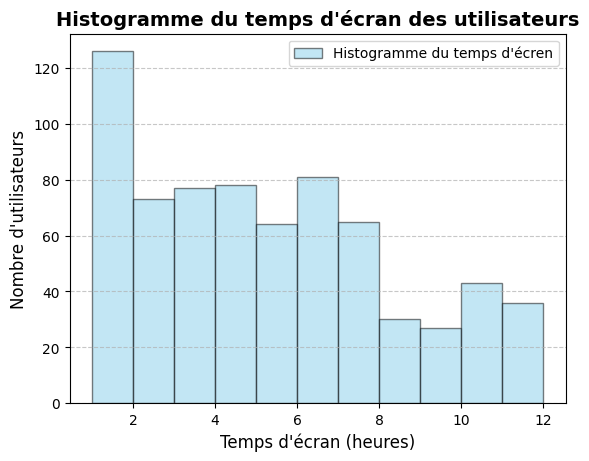

In [32]:
# 10-VISUALISATION DE L'HISTOGRAMME :
plt.hist(data["Screen_On_Time"], bins=range(valeur_min, valeur_max + 1), alpha=0.5, label="Histogramme du temps d'écren", color='skyblue', edgecolor='black')
plt.title("Histogramme du temps d'écran des utilisateurs", fontsize=14, fontweight='bold')
plt.xlabel("Temps d'écran (heures)", fontsize=12)
plt.ylabel("Nombre d'utilisateurs", fontsize=12)
plt.legend()
# Afficher la grille pour mieux visualiser
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

📊 Interprétation de l’histogramme (temps d’écran)

Cet histogramme représente le temps d’écran quotidien des utilisateurs, en heures.

Le temps d’écran varie entre 1 heure et 12 heures.

La majorité des utilisateurs passent entre 4 et 6 heures par jour devant l’écran.

La moyenne du temps d’écran est d’environ 5 heures, ce qui correspond au centre de l’histogramme.

Il y a peu d’utilisateurs qui passent très peu de temps (1–2 heures) ou beaucoup de temps (10–12 heures).

La distribution est assez étalée, ce qui montre que les habitudes des utilisateurs sont différentes.

👉 Conclusion :
La plupart des utilisateurs ont un temps d’écran moyen, autour de 5 heures par jour, mais certains utilisent l’écran beaucoup plus ou beaucoup moins.

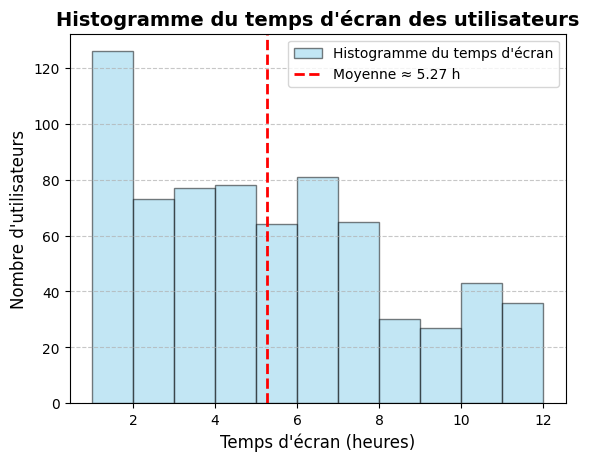

In [31]:
# Histogramme
plt.hist(
    data["Screen_On_Time"],
    bins=range(valeur_min, valeur_max + 1),
    alpha=0.5,
    color='skyblue',
    edgecolor='black',
    label="Histogramme du temps d'écran"
)

# Ligne verticale de la moyenne
plt.axvline(
    moyenne,
    color='red',
    linestyle='--',
    linewidth=2,
    label=f"Moyenne ≈ {round(moyenne, 2)} h"
)

# Titres et labels
plt.title("Histogramme du temps d'écran des utilisateurs", fontsize=14, fontweight='bold')
plt.xlabel("Temps d'écran (heures)", fontsize=12)
plt.ylabel("Nombre d'utilisateurs", fontsize=12)

# Légende et grille
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

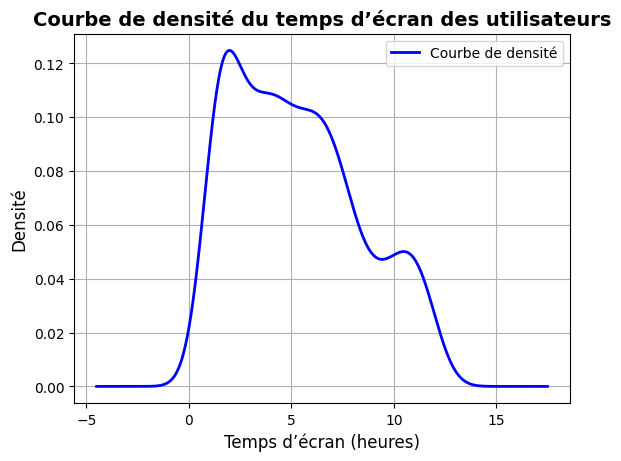

In [ ]:
# 11- VISUALISATION DE LA COURBE DE DENSITE:
# Courbe de densité
data["Screen_On_Time"].plot.density(
    color='blue',
    linestyle='-',
    linewidth=2,
    label='Courbe de densité'
)

# Titres et axes
plt.title("Courbe de densité du temps d’écran des utilisateurs", fontsize=14, fontweight='bold')
plt.xlabel("Temps d’écran (heures)", fontsize=12)
plt.ylabel("Densité", fontsize=12)

# Légende et grille
plt.legend()
plt.grid(True)

plt.show()

📈 Interprétation de la courbe de densité

Cette courbe de densité montre la répartition du temps d’écran des utilisateurs.

Le temps d’écran commence autour de 1 heure et peut aller jusqu’à 12 heures.

Le pic de la courbe se situe entre 4 et 6 heures.
👉 Cela signifie que la majorité des utilisateurs passent environ 5 heures par jour devant l’écran.

La courbe descend doucement après 6 heures, ce qui montre que :

il y a moins d’utilisateurs qui dépassent 8 à 10 heures par jour.

La forme de la courbe est étalée, donc les comportements des utilisateurs sont différents.

👉 Conclusion :
La plupart des utilisateurs ont un temps d’écran moyen, autour de 5 heures par jour, tandis qu’une minorité utilise l’écran très peu ou beaucoup.


La courbe de densité montre que le temps d’écran le plus fréquent est autour de 5 heures, avec moins d’utilisateurs aux valeurs extrêmes.

In [33]:
print(data.isnull().sum())

Screen_On_Time    0
dtype: int64


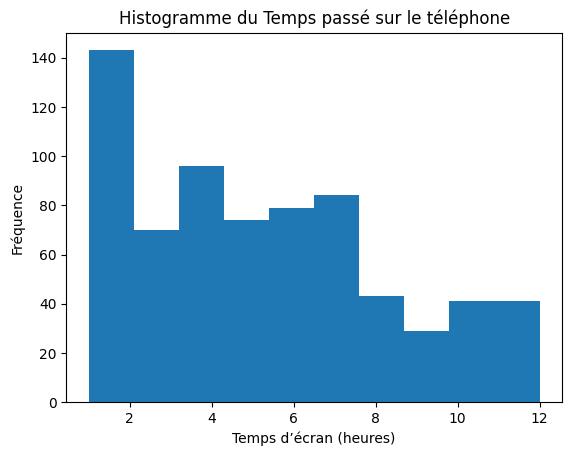

In [38]:
plt.hist(data["Screen_On_Time"])
plt.xlabel("Temps d’écran (heures)")
plt.ylabel("Fréquence")
plt.title("Histogramme du Temps passé sur le téléphone")
plt.show()

Introduction de la variable

« Ici, nous analysons la variable Screen_On_Time, c’est-à-dire le temps que chaque utilisateur passe sur son téléphone par jour. »

Présentation du graphique

« J’ai représenté cette variable sous forme d’un histogramme.

L’axe X correspond aux valeurs du temps d’écran (en heures).

L’axe Y correspond à la fréquence, c’est-à-dire combien d’utilisateurs ont passé un certain temps sur le téléphone. »

Ce que le diagramme montre

« Chaque barre montre le nombre d’utilisateurs dans un intervalle de temps précis.

Les barres plus hautes indiquent la majorité des utilisateurs.

Les barres plus basses montrent les cas plus rares, où peu de personnes passent beaucoup de temps sur le téléphone. »
« Grâce à cet histogramme, on peut rapidement visualiser la répartition du temps d’écran et identifier si la majorité des utilisateurs ont un temps d’écran faible, moyen ou élevé. »

In [39]:
# test - D'HYPOTHESE :
print("Hypothèse nulle H0 : la moyenne est égale à 5")
print("Hypothèse alternative H1 : la moyenne est différente de 5")
test = scipy.stats.ttest_1samp(data["Screen_On_Time"], 5)
print(f"Résultat du test d'hypothèse : {test}")

Hypothèse nulle H0 : la moyenne est égale à 5
Hypothèse alternative H1 : la moyenne est différente de 5
Résultat du test d'hypothèse : TtestResult(statistic=np.float64(2.351358802863444), pvalue=np.float64(0.018981690157619618), df=np.int64(699))


🧪 Interprétation du test d’hypothèse

Hypothèse nulle (H₀) : la moyenne du temps d’écran est égale à 5 heures

Hypothèse alternative (H₁) : la moyenne du temps d’écran est différente de 5 heures

📊 Résultats du test

Statistique t = 2,35

p-value = 0,019

Degrés de liberté = 699

Seuil de signification : α = 0,05

✅ Décision

Comme p-value = 0,019 < 0,05,
👉 on rejette l’hypothèse nulle H₀.

Il existe une différence significative entre la moyenne observée du temps d’écran et 5 heures.
Le temps d’écran moyen des utilisateurs est statistiquement différent de 5 heures

Comme ta moyenne observée est 5,27 heures, on peut dire qu’elle est légèrement supérieure à 5 heures.

Au seuil de 5 %, le test t de Student montre que la moyenne du temps d’écran est significativement différente de 5 heures (p-value = 0,019).

